In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

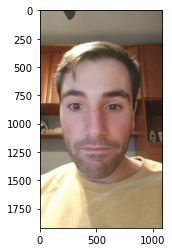

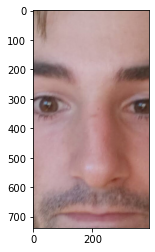

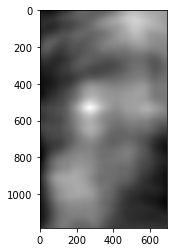

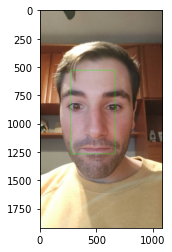

In [59]:
irudia = cv2.imread('Mikel_Aldalur.jpg')
irudia = cv2.cvtColor(irudia, cv2.COLOR_BGR2RGB)
plt.imshow(irudia)
plt.show()
template = cv2.imread('Mikel_Aldalur_mask.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template)
plt.show()
match = cv2.matchTemplate(irudia,maskara,cv2.TM_CCOEFF)
plt.imshow(match, cmap='gray')
plt.show()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
cv2.rectangle(irudia, max_loc, (max_loc[0] + template.shape[1], max_loc[1] + template.shape[0]), (0,255,0), 2)
plt.imshow(irudia)
plt.show()

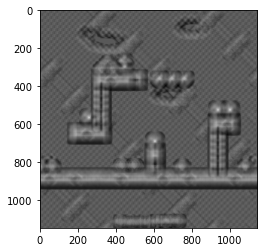

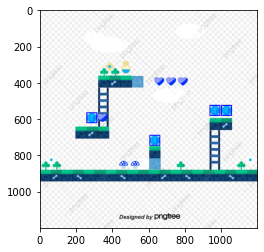

In [73]:
irudia = cv2.imread('mario.jpg')
irudia_g = cv2.cvtColor(irudia, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(irudia_g,template,cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')
plt.show()
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(irudia, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(irudia)
plt.show()

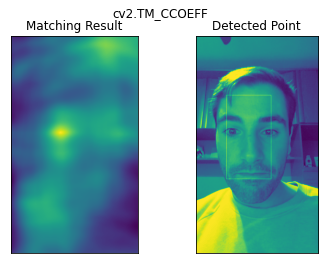

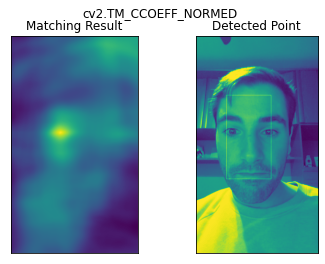

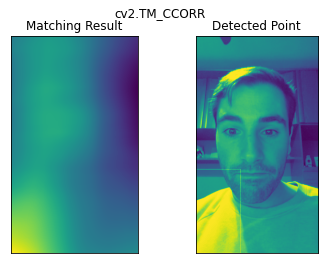

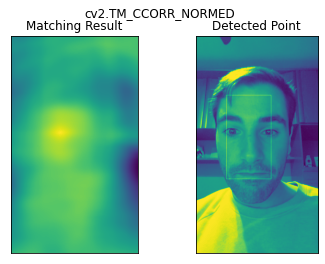

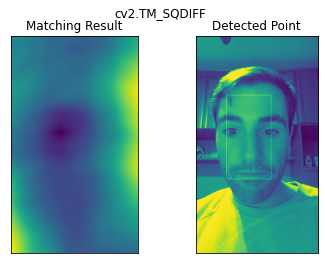

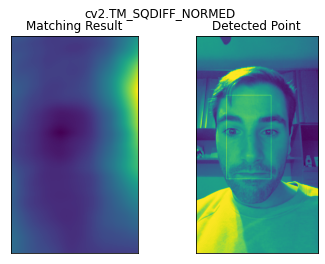

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Mikel_Aldalur.jpg',0)
img2 = img.copy()
template = cv2.imread('Mikel_Aldalur_mask.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()